In [60]:
from pandas import read_csv, DataFrame, concat, Series
from sklearn.decomposition import PCA
from IPython.display import display
from seaborn import kdeplot, distplot, set_style, despine, lmplot
from matplotlib.pyplot import figure, show, title, subplots
from itertools import combinations
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [2]:
data = read_csv('Feature/feature_tt1.csv')
x = data.drop("Level", 1)
y = data["Level"]

In [3]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
pca.n_components_

56

In [5]:
#Explained Variance
DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,57)], columns=["Explained Variance"]).T

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56
Explained Variance,3.645005e+13,1.025795e+13,6.359616e+12,5.014733e+12,3.715056e+12,2.846755e+12,2.600662e+12,2.369957e+12,3.851746e+11,1.781919e+11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Explained Variance Ratio
DataFrame(pca.explained_variance_ratio_.round(2), index = ["P" + str(i) for i in range(1,57)], columns=["Explained Variance Ratio"]).T

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56
Explained Variance Ratio,0.52,0.15,0.09,0.07,0.05,0.04,0.04,0.03,0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Preview of PCA Transformed Data
components_applied = DataFrame(pca.transform(x))
components_applied.columns = ["P" + str(i) for i in range(1,57)]
components_applied.round(2).head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56
0,1356044.84,2510365.89,-1729284.95,-4698490.30,-3034329.01,-864681.08,778046.36,3708308.25,-13180.39,363806.59,...,-0.00,0.01,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0
1,1280979.63,2640509.29,-895560.90,-817504.40,-1344649.48,-915919.85,-869953.58,-595695.10,-486127.33,227254.88,...,0.00,0.00,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
2,-2859690.53,2784407.53,659685.59,-642674.26,661218.92,1200451.75,-381100.34,655382.81,-649728.65,-1747.43,...,-0.00,-0.00,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0
3,-3251001.92,2753757.65,-1127425.83,-163546.08,742007.01,1429124.27,-1032250.34,2705062.81,-499818.46,103038.96,...,-0.00,0.00,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
4,-278052.87,2543410.40,352100.13,-3115248.44,-1098773.02,580439.78,499092.84,-934301.04,-544489.03,271809.51,...,-0.01,0.01,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0


In [8]:
#Pearson Correlations of Components with Glass Features
for p in components_applied.columns:
    new_df = x.copy()
    new_df[p] = components_applied[p]
    display(DataFrame(new_df.corr().round(2)[p]).drop(p,0).T)

,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P1,0.48,-0.51,-0.3,-0.22,0.48,0.49,NaN,0.13,-0.48,-0.1,...,-0.92,-0.92,NaN,-0.55,-0.79,-0.2,-0.13,-0.61,-0.61,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P2,-0.42,0.47,0.5,0.52,-0.6,-0.56,NaN,-0.24,0.44,0.21,...,0.03,0.06,NaN,0.48,0.04,0.02,-0.07,0.47,0.47,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P3,0.29,-0.04,-0.27,-0.26,0.28,0.29,NaN,0.47,0.08,-0.48,...,-0.06,-0.07,NaN,-0.28,-0.05,-0.09,-0.01,-0.33,-0.33,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P4,0.59,0.09,-0.39,-0.34,0.5,0.53,NaN,0.16,0.01,-0.11,...,0.27,0.29,NaN,0.31,0.15,0.02,-0.02,0.26,0.27,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P5,-0.05,-0.21,0.03,0.02,-0.03,-0.04,NaN,-0.5,-0.29,0.51,...,-0.0,0.01,NaN,-0.12,0.12,-0.26,-0.23,-0.2,-0.2,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P6,-0.23,-0.09,0.12,0.12,-0.22,-0.23,NaN,0.33,0.09,-0.29,...,0.23,0.23,NaN,-0.35,-0.07,-0.12,-0.07,-0.37,-0.37,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P7,-0.07,0.03,0.16,0.19,-0.14,-0.12,NaN,0.48,0.1,-0.46,...,-0.12,-0.12,NaN,0.08,0.1,0.22,0.21,0.15,0.15,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P8,0.08,-0.0,0.03,0.04,0.08,0.08,NaN,-0.29,-0.1,0.31,...,0.02,0.01,NaN,-0.13,0.05,-0.08,-0.06,-0.15,-0.15,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P9,0.01,-0.14,0.03,0.05,-0.02,-0.0,NaN,0.0,-0.08,-0.03,...,-0.04,-0.0,NaN,0.05,0.11,-0.03,-0.01,-0.01,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P10,0.28,0.36,-0.04,0.14,-0.12,-0.01,NaN,-0.0,0.28,-0.01,...,-0.03,-0.0,NaN,0.06,0.01,-0.14,-0.15,-0.02,-0.01,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P11,-0.09,-0.03,-0.03,-0.1,0.04,0.0,NaN,-0.02,-0.01,-0.04,...,-0.06,-0.01,NaN,0.1,0.13,-0.2,-0.18,-0.02,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P12,0.04,-0.09,-0.07,-0.03,-0.02,-0.0,NaN,-0.01,-0.09,-0.04,...,0.0,0.0,NaN,0.07,0.02,-0.13,-0.12,-0.01,0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P13,-0.03,-0.13,0.01,0.01,0.01,0.0,NaN,0.03,-0.03,0.07,...,-0.0,-0.0,NaN,0.07,-0.09,-0.07,-0.06,-0.01,0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P14,-0.01,0.19,0.07,0.06,0.01,-0.0,NaN,0.02,0.18,0.02,...,0.01,0.0,NaN,0.31,0.05,-0.61,-0.58,-0.03,0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P15,-0.01,0.12,0.07,0.06,0.01,0.0,NaN,0.02,0.14,0.04,...,0.0,-0.0,NaN,-0.04,-0.0,0.07,0.07,0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P16,0.0,0.11,-0.01,-0.02,0.0,-0.0,NaN,0.1,0.17,0.18,...,-0.0,-0.0,NaN,-0.04,0.01,0.05,0.06,0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P17,-0.01,0.47,0.07,0.04,0.01,-0.0,NaN,-0.02,0.31,-0.04,...,-0.0,0.0,NaN,-0.03,-0.08,0.03,0.03,0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P18,0.0,-0.0,0.03,0.04,0.0,-0.0,NaN,-0.0,-0.03,0.0,...,-0.0,0.0,NaN,0.0,0.05,0.02,0.02,-0.0,0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P19,-0.0,0.01,0.0,0.0,-0.0,0.0,NaN,0.0,-0.2,0.01,...,-0.01,0.01,NaN,-0.0,-0.07,0.1,0.11,-0.0,0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P20,0.0,-0.01,0.1,0.11,0.0,-0.0,NaN,-0.0,0.38,-0.01,...,-0.0,0.0,NaN,-0.0,0.11,0.1,0.12,-0.0,0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P21,-0.01,0.0,-0.02,-0.09,-0.01,0.01,NaN,-0.0,0.06,-0.01,...,0.0,-0.0,NaN,-0.0,0.04,0.01,0.03,-0.0,0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P22,0.0,-0.0,-0.01,-0.0,0.0,-0.0,NaN,0.0,0.01,0.0,...,-0.0,0.0,NaN,0.0,-0.02,-0.0,-0.0,0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P23,0.0,0.0,0.05,0.08,0.0,-0.0,NaN,-0.0,-0.01,-0.02,...,-0.0,0.0,NaN,-0.0,-0.06,-0.06,-0.05,0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P24,0.0,-0.0,0.08,0.09,0.0,-0.0,NaN,0.0,-0.0,0.01,...,-0.0,0.0,NaN,0.0,0.07,-0.37,-0.44,0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P25,-0.0,0.0,0.02,0.02,-0.0,0.0,NaN,-0.0,0.01,-0.03,...,-0.0,0.0,NaN,0.0,-0.06,-0.17,-0.22,0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P26,-0.0,-0.0,-0.04,-0.05,-0.0,0.0,NaN,0.0,-0.0,0.05,...,-0.0,0.0,NaN,0.0,-0.01,0.04,0.03,0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P27,0.0,0.0,-0.04,-0.04,0.0,-0.0,NaN,-0.0,0.01,-0.05,...,0.0,-0.0,NaN,-0.0,-0.01,0.12,0.12,-0.0,0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P28,-0.0,0.0,-0.1,-0.11,-0.0,0.0,NaN,0.0,-0.01,0.0,...,0.0,-0.0,NaN,-0.0,0.16,0.12,0.13,-0.0,0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P29,-0.0,0.0,-0.11,-0.11,-0.0,0.0,NaN,-0.0,-0.0,-0.01,...,0.0,-0.0,NaN,-0.0,0.18,-0.02,-0.02,0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P30,-0.0,0.0,0.07,0.07,-0.0,0.0,NaN,-0.0,-0.0,-0.0,...,-0.0,0.0,NaN,0.0,-0.02,0.01,0.0,0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P31,0.0,-0.0,0.09,0.07,-0.0,0.0,NaN,0.0,0.0,-0.0,...,-0.0,0.0,NaN,0.0,0.02,-0.02,-0.03,0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P32,0.0,0.0,0.03,0.04,0.0,-0.0,NaN,-0.0,-0.0,-0.0,...,-0.0,0.0,NaN,0.0,0.43,-0.02,-0.01,0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P33,-0.0,0.0,0.2,0.23,-0.0,0.0,NaN,-0.0,-0.0,-0.01,...,0.0,-0.0,NaN,0.0,0.0,0.3,0.34,0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P34,-0.0,0.0,0.06,0.06,-0.0,0.0,NaN,-0.0,-0.0,-0.0,...,-0.0,0.0,NaN,0.0,0.0,0.05,0.04,0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P35,0.0,-0.0,-0.48,-0.51,0.0,-0.0,NaN,-0.0,0.0,-0.0,...,0.0,0.0,NaN,0.0,0.0,0.06,0.08,0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P36,-0.0,0.0,0.08,0.08,-0.0,0.0,NaN,-0.0,0.0,-0.0,...,0.0,-0.0,NaN,-0.0,0.0,-0.18,-0.18,-0.0,0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P37,-0.0,0.0,0.07,0.08,-0.0,0.0,NaN,0.0,-0.0,-0.0,...,0.0,-0.0,NaN,0.0,0.0,-0.0,0.01,0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P38,-0.0,0.0,0.0,-0.0,-0.0,-0.0,NaN,0.0,0.0,-0.01,...,0.0,0.0,NaN,0.0,0.0,0.01,0.0,0.0,0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P39,0.0,-0.0,-0.01,-0.0,0.0,0.0,NaN,0.0,-0.0,-0.0,...,-0.0,-0.0,NaN,-0.0,-0.0,0.02,-0.0,-0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P40,0.0,0.0,-0.02,0.0,-0.0,-0.0,NaN,0.0,0.0,0.06,...,-0.0,-0.0,NaN,0.0,0.0,-0.0,0.0,0.0,0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P41,0.0,-0.0,0.04,-0.0,0.0,0.0,NaN,0.0,-0.0,0.0,...,-0.0,-0.0,NaN,-0.0,0.0,0.1,-0.0,-0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P42,-0.0,0.0,-0.07,0.0,-0.0,-0.0,NaN,-0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.03,-0.0,0.0,0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P43,-0.0,0.0,-0.07,0.0,-0.0,-0.0,NaN,-0.0,0.0,-0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,-0.0,0.0,0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P44,0.0,-0.0,0.01,-0.0,0.0,0.0,NaN,0.0,-0.0,0.0,...,-0.0,-0.0,NaN,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P45,-0.0,0.0,0.0,-0.0,-0.0,-0.0,NaN,0.0,0.0,-0.0,...,0.0,0.0,NaN,0.0,0.0,-0.0,0.0,0.0,0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P46,0.0,-0.0,-0.0,0.0,0.0,0.0,NaN,0.0,-0.0,-0.01,...,-0.0,-0.0,NaN,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P47,-0.0,0.0,0.0,-0.0,-0.0,-0.0,NaN,0.0,0.0,0.01,...,-0.0,-0.0,NaN,0.0,-0.0,-0.0,0.0,0.0,0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P48,-0.0,0.0,0.0,-0.0,-0.0,-0.0,NaN,-0.0,0.0,-0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P49,-0.17,0.13,-0.03,-0.1,-0.07,-0.1,NaN,0.08,0.16,-0.14,...,0.53,0.5,NaN,0.16,0.47,0.15,0.15,0.21,0.2,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P50,0.39,-0.32,-0.19,-0.11,0.38,0.39,NaN,0.01,-0.34,0.05,...,-0.71,-0.71,NaN,-0.38,-0.65,-0.1,-0.07,-0.41,-0.41,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P51,-0.19,-0.22,0.04,-0.01,-0.03,-0.08,NaN,-0.53,-0.33,0.54,...,0.09,0.05,NaN,-0.17,0.07,0.0,0.01,-0.12,-0.13,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P52,0.4,-0.03,-0.17,-0.09,0.28,0.32,NaN,0.4,0.03,-0.37,...,-0.48,-0.47,NaN,-0.1,-0.46,-0.09,-0.07,-0.16,-0.16,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P53,0.04,-0.19,0.14,0.17,0.02,0.03,NaN,-0.58,-0.32,0.6,...,-0.41,-0.41,NaN,-0.16,-0.31,-0.22,-0.23,-0.2,-0.2,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P54,-0.0,0.0,0.08,0.1,0.0,-0.0,NaN,-0.0,-0.0,0.0,...,0.0,-0.0,NaN,-0.0,0.0,0.14,0.14,-0.0,0.0,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P56,0.24,-0.15,-0.28,-0.29,0.29,0.28,NaN,-0.13,-0.2,0.22,...,0.25,0.24,NaN,-0.22,0.1,-0.13,-0.09,-0.28,-0.27,NaN


IndexError: index 2 is out of bounds for axis 0 with size 2

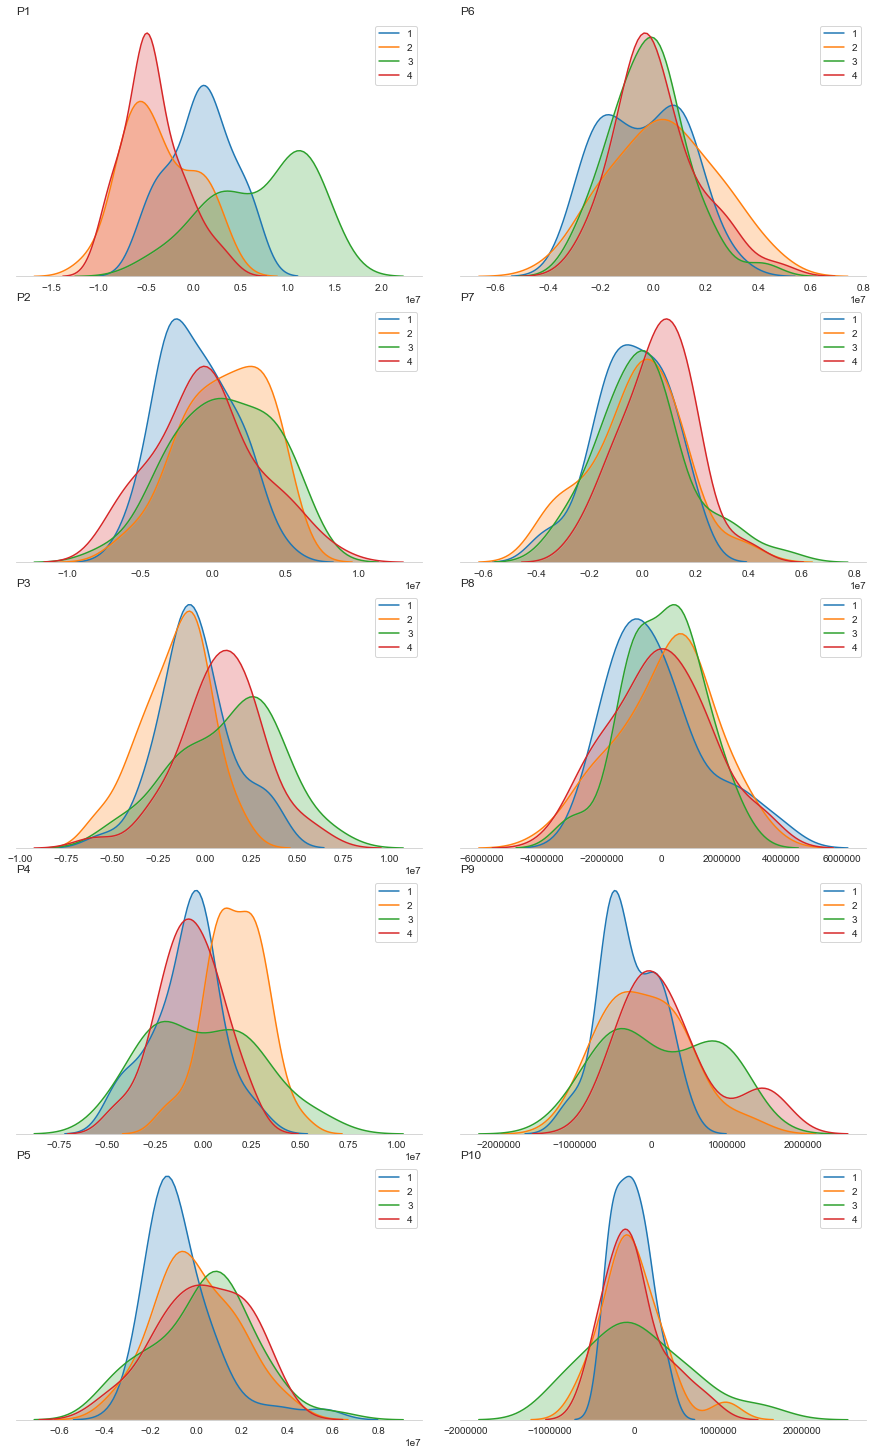

In [9]:
#Distribution Plots of Each Component by Glass Type
set_style("whitegrid")
set_style({"axes.grid":False})

for_plotting = components_applied.copy()
for_plotting["Type"] = y

n = 10
fig, axes = subplots(int(10/2),2, figsize=(12.5,20))
fig.tight_layout()
i = 0
j = 0


for p in components_applied.columns:
    
    for t in for_plotting["Type"].unique():
        data_by_type = for_plotting[for_plotting["Type"] == t]
        kdeplot(Series(data_by_type[p], name = t), shade=True, ax=axes[i][j])
        #distplot(Series(data_by_type[p], name = t), kde=False, ax=axes[i][j])
        axes[i][j].set_title(p, loc="left")
        axes[i][j].set_xlabel("",visible=False)
        axes[i][j].set_yticklabels([],visible=False)
        despine(left=True)
    i += 1
    
    if(i == n/2):
        i = 0
        j += 1
    
show()

In [36]:
sb.set(font_scale=1.2,style="whitegrid") #set styling preferences
l = pd.read_csv('Feature/feature_tt1.csv').sample(frac = .25) #read the dataset and sample 25% of it

In [37]:
#Data Wrangling
l.replace([np.inf, -np.inf], np.nan) #convert infs to nans
l = l.dropna(axis = 1, how = 'any') #remove nans
l = l.drop("Level",axis=1)
l = l._get_numeric_data() #keep only numeric features

In [38]:
#Standardize
x = l.values #convert the data into a numpy array
x = scale(x);x

array([[-1.09760042,  1.65818183,  2.3252119 , ...,  0.15666714,
         0.13194864,  0.        ],
       [-0.07387386,  1.87679733, -0.10553361, ...,  1.58834554,
         1.61643876,  0.        ],
       [-1.00897675, -0.42961802,  0.68788004, ...,  0.65549489,
         0.63067185,  0.        ],
       ...,
       [ 0.0847566 , -0.25272494, -0.46874471, ..., -1.07672787,
        -1.06328444,  0.        ],
       [ 1.71973247, -0.2343293 , -1.17492877, ..., -1.07725028,
        -1.06532139,  0.        ],
       [-0.92106619,  2.67908844,  2.24506803, ...,  1.58974633,
         1.61788854,  0.        ]])

In [57]:
covar_matrix = PCA(n_components = 40)

In [58]:
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([30.9, 47.9, 59.2, 67.6, 74.6, 79.9, 83.8, 87.1, 89.9, 92.1, 93.7,
       95.2, 96.2, 97. , 97.6, 98.1, 98.5, 98.8, 99. , 99.2, 99.4, 99.6,
       99.7, 99.8, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9,
       99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9])

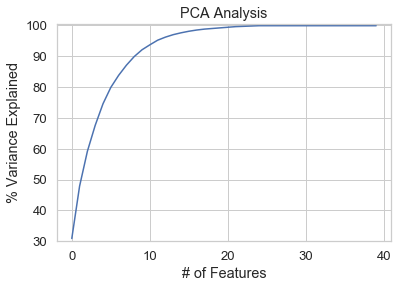

In [61]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)